# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).

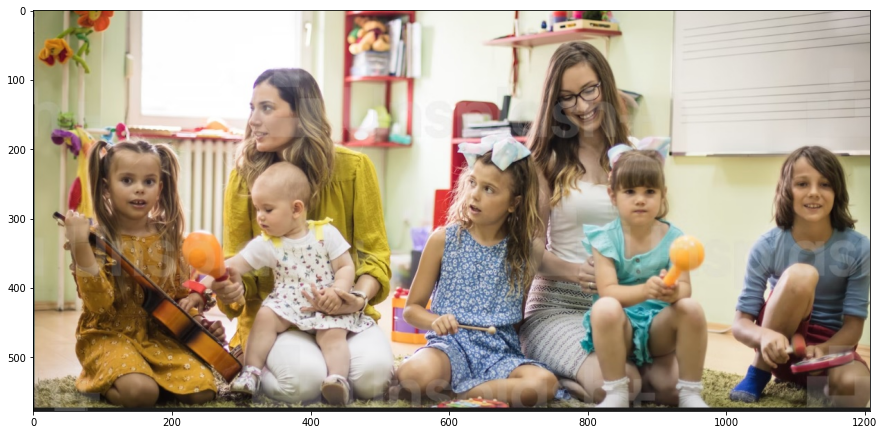

In [10]:
img = cv2.imread('C:\\Users\\vlazarenko\\Desktop\\!cv\\lesson_9\\1234.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

face_cascade = cv2.CascadeClassifier('C:\\Users\\vlazarenko\\Desktop\\!cv\\lesson_9\\haarcascade_frontalface_alt.xml')


### Step 2

Load the dlib face predictor.

Number of detected faces: 6
1091 229 75 75
113 221 74 75
602 229 75 75
295 121 75 75
847 246 62 62
760 96 74 75


(<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>,
 Text(0.5, 1.0, 'dlib'))

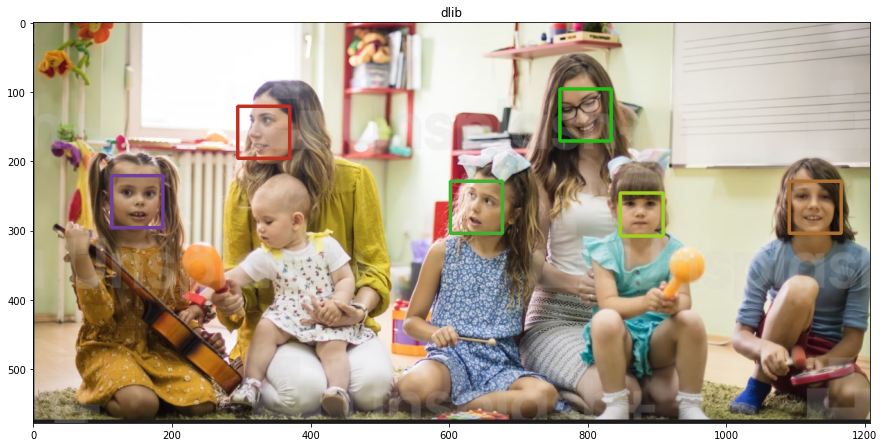

In [34]:
import dlib
import random
# Let's load the detector
detector = dlib.get_frontal_face_detector()
# Detect faces, see http://dlib.net/face_detector.py.html
# 1 --> upsampling factor
rects = detector(gray, 1)

print('Number of detected faces:', len(rects))
print(rects)
#print(rects[0].left)

def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)


# Draw rectangle around each face
result_dlib = np.copy(img)
faces_dlib_img = []

def random_color():
    levels = range(16,256,16)
    return tuple(random.choice(levels) for _ in range(3))

for rect in rects:    
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    print(x, y, w, h)
    cv2.rectangle(result_dlib, (x, y), (x+w, y+h), random_color(), 3)
    faces_dlib_img.append(img[y:y+h, x:x+w, :])
    

plt.plot, plt.imshow(result_dlib), plt.title('dlib')

### Step 3

Run the predictor on your image.

In [13]:
# Load the predictor (you need to download the predictor from an available source)
predictor = dlib.shape_predictor('C:\\Users\\vlazarenko\\Desktop\\!cv\\lesson_9\\shape_predictor_68_face_landmarks.dat')




### Step 4
Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.


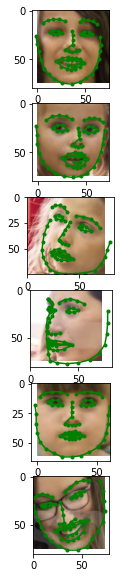

In [35]:

f, axarr = plt.subplots(6,1) 

def plot_landmarks(vec,i):
    axarr[i].plot(vec[0:17,0], vec[0:17,1], 'g.-')       # Contour
    axarr[i].plot(vec[48:68,0], vec[48:68,1], 'g.-')     # Mouth
    axarr[i].plot(vec[17:22,0], vec[17:22,1], 'g.-')     # Right eyebrow
    axarr[i].plot(vec[22:27,0], vec[22:27,1], 'g.-')     # Left eyebrow
    axarr[i].plot(np.concatenate((vec[36:42,0], vec[36:37,0])), np.concatenate((vec[36:42,1], vec[36:37,1])), 'g.-')     # Left eye
    axarr[i].plot(np.concatenate((vec[42:48,0], vec[42:43,0])), np.concatenate((vec[42:48,1], vec[42:43,1])), 'g.-')     # Right eye
    axarr[i].plot(vec[27:36,0], vec[27:36,1], 'g.-')     # Nose


number = 0
for face in faces_dlib_img:
    #face = faces_dlib_img[1]
    rows, cols, _ = face.shape
    rect = dlib.rectangle(0, 0, cols, rows)
    shape = predictor(cv2.cvtColor(face, cv2.COLOR_RGB2GRAY), rect)

    # Convert landmarks to ndarray for better manipulation
    kps = list(map(lambda p: (p.x, p.y), shape.parts()))
    landmarks = np.array(kps)
    #print(kps)
    axarr[number].imshow(face)
    plot_landmarks(landmarks,number)
    number += 1


### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

### Please see Homework9_Continue.ipynb
### https://github.com/Valeriy77/cv_training

### Detector works with different faces and is quite strong, however sometimes does not recognize faces in perfect condition. One-eyed humans, people with helmets, glasses are not a problem for the detector. Cyclops (one eye in the middle) were not recognized on my test, which makes sense as such people don't represent real life examples. Overall, the filter is quite strong and robust to be used in the business/government solutions.